# Support Vector Classifier (SVC)

In [1]:
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.style.use("Solarize_Light2")

In [2]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST Original')
mnist

/Users/rajatrasal/anaconda3/envs/crypto_time_series/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/rajatrasal/anaconda3/envs/crypto_time_series/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [3]:
from sklearn.model_selection import train_test_split

X, y = mnist['data'], mnist['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"""X_train: {X_train.shape} X_test: {X_test.shape},
y_train: {y_train.shape} y_test: {y_test.shape}""")

X_train: (52500, 784) X_test: (17500, 784),
y_train: (52500,) y_test: (17500,)


## Model

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

### How it works

A **Support Vector Classifier (SVC)** is used to provide an optimal hyperplane which can **separate data points into classes**. For a 2D dataset, this hyperplane is a line which separates data points into their individual catagories.

Some key terms need to defined before going further:
* **Gamma** - Determines how far the significant the influence of a single training point is when determining the cost of a model. ** (3) **
* **Margin** - Determined by C in scikit-learn. Determines the acceptable width of the separate boundary. 
    * Hard-Margin - strict and can lead to overfitting. Very sensitive to outliers. C is high.
    * Soft-Margin - more flexible. C is low.
* **Support Vectors** - image below:
![support-vectors.png](images/support-vectors.png)
* **Kernel** - These are mathematical functions which take the input and transform it to some other form, which in turn, should make it easier identify class boundaries. Different types of kernels include: linear, nonlinear, polynomial ** (1) **, radial basis functions (RBF) and sigmoid. A kernel will return the inner product between two data records in the dataset, where one is selected as a landmark. Through the inner product, we have some notion of *similarity* between these points. So if we have 2 landmarks, by taking the inner product of each point in the dataset with the landmarks, we can now plot each data point in a 2D plane, regardless of how many features each data point has. ** (2) **

Both gamma and margin regularisation parameters for an SVC.

> #### *The objective is to find a good balance between keeping the street as large as possible and limiting the margin violations. - Tensorflow and Sklearn book page 149.*

SVMs are sensitive to scaling!

#### SV Kernels

#### SV Loss Functions

---
** (1) ** Polynomial kernels are computationally inefficient and are not as effective when it comes to predictions.

** (2) ** The most popular kernel for nonlinearly separable datasets is the RBF. The idea behind this kernel is to create non-linear combinations of features to lift the dataset into a higher dimensional feature space, where linear separation is posisble. The inner product here is defined as: $$\phi_{\gamma}(x, l) = exp(-\gamma \space || \space x-l \space ||^2)$$ where l is the landmark and x the point we want to transform/project.
![RBF-Kernel.png](images/RBF-Kernel.png)

** (3) ** In an RBF Kernel, increasing gamma makes the bell curve around each landmark narrower. From the formula in ** (2) **, we see how a larger gamma would increase the value of the norm, hence increasing how sensitive the model is to points which are further away.

In [5]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, 
                                                    test_size=0.1, random_state=42)

### Linear SVC

In [6]:
linear_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=2, loss="hinge", max_iter=100)),
])

linear_svm_clf.fit(X_train2, y_train2)

y_train_pred = cross_val_predict(linear_svm_clf, X_train2, y_train2, cv=5)
y_val_pred = cross_val_predict(linear_svm_clf, X_val, y_val, cv=5)
print(f"train accuracy: {accuracy_score(y_train2, y_train_pred)}")
print(f"val accuracy: {accuracy_score(y_val, y_val_pred)}")

train accuracy: 0.8641904761904762
val accuracy: 0.8278095238095238


f1 score: [0.90991811 0.92601432 0.78190955 0.80285459 0.82731707 0.73181325
 0.86834734 0.85465116 0.75592173 0.77579365]


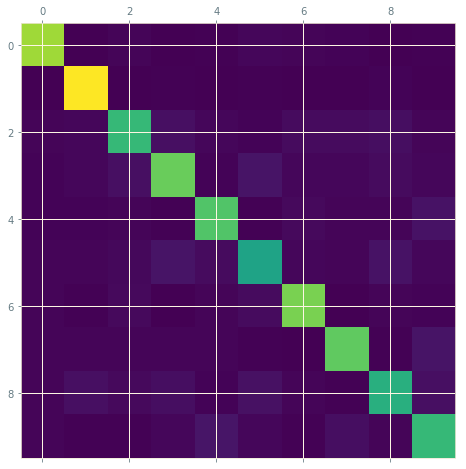

In [7]:
conf_mx = confusion_matrix(y_val, y_val_pred)
print(f"f1 score: {f1_score(y_val, y_val_pred, average=None)}")

fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_mx)
plt.show()

### Polynomial Kernel

I have choosen hyperparameters from http://yann.lecun.com/exdb/mnist/.

In [8]:
poly_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_svc', SVC(kernel="poly", degree=9, coef0=5, 
                     C=5, max_iter=30, cache_size=1000,
                     verbose=True)),
])

poly_svm_clf.fit(X_train2, y_train2)

y_train_pred = cross_val_predict(poly_svm_clf, X_train2, y_train2, cv=5)
y_val_pred = cross_val_predict(poly_svm_clf, X_val, y_val, cv=5)
print()
print(f"train accuracy: {accuracy_score(y_train2, y_train_pred)}")
print(f"val accuracy: {accuracy_score(y_val, y_val_pred)}")

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]
train accuracy: 0.7660317460317461
val accuracy: 0.8796190476190476


f1 score: [0.94538944 0.95153473 0.85601578 0.85017422 0.86735654 0.85148515
 0.92655367 0.86546185 0.85452696 0.8       ]


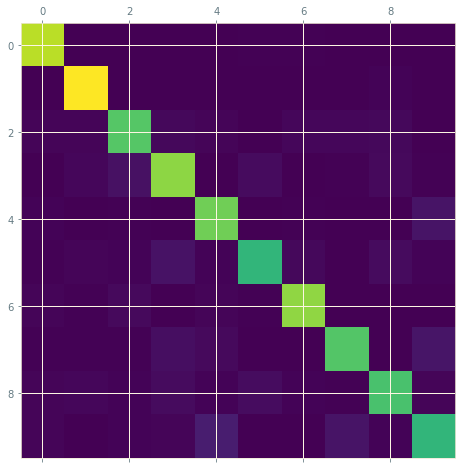

In [9]:
conf_mx = confusion_matrix(y_val, y_val_pred)
print(f"f1 score: {f1_score(y_val, y_val_pred, average=None)}")

fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_mx)
plt.show()

### SVC with Gaussian RBF Kernel

In [10]:
rbf_kernel_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('rbf_kernel', SVC(gamma=0.05, C=5, max_iter=10, 
                       cache_size=1000, tol=1e-4, 
                       verbose=True))
])

rbf_kernel_clf.fit(X_train2, y_train2)

y_train_pred = cross_val_predict(rbf_kernel_clf, X_train2, y_train2, cv=5)
y_val_pred = cross_val_predict(rbf_kernel_clf, X_val, y_val, cv=5)
print()
print(f"train accuracy: {accuracy_score(y_train2, y_train_pred)}")
print(f"val accuracy: {accuracy_score(y_val, y_val_pred)}")

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]
train accuracy: 0.21682539682539684
val accuracy: 0.3182857142857143


f1 score: [0.36893204 0.91495076 0.23774146 0.22824536 0.30630631 0.21016006
 0.18305085 0.27089337 0.30201342 0.19145299]


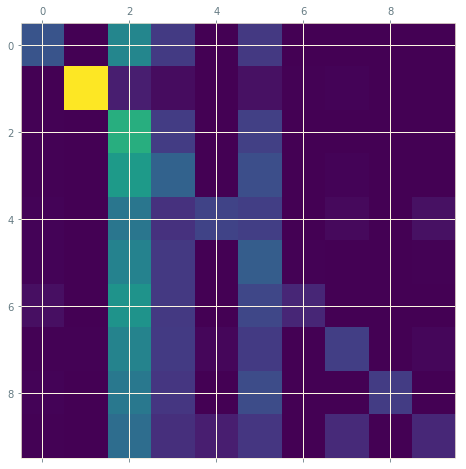

In [11]:
conf_mx = confusion_matrix(y_val, y_val_pred)
print(f"f1 score: {f1_score(y_val, y_val_pred, average=None)}")

fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_mx)
plt.show()

The main issue with the RBF Kernel is the high dimensionality of the data. This in addition to the already large dataset, 40,000 images +, means that the linear SVM will take a very long time to compute an optimal hyperplane since there will be many more coefficients which need to be optimized. 

Since this SVM will eventually be used within an ensemble, even if we have a set of weak classifiers (classifier which are no better than random guessing), we can build them up to make a strong classifier. Hence, a classifier which has an average performance and can be trained quickly is more appropriate than one which takes ages.

## Tuning

In [13]:
from sklearn.model_selection import GridSearchCV


poly_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_svc', SVC(max_iter=10, cache_size=1000,
                     verbose=True)),
])


params = [{'poly_svc__kernel': ['poly'], 
           'poly_svc__C': [5], 
           'poly_svc__degree': [8, 9], 
           'poly_svc__coef0': [5, 6, 7]}]

grid_search = GridSearchCV(poly_svm_clf, params, scoring='accuracy')
grid_search.fit(X_train2, y_train2)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly_svc', SVC(C=1.0, cache_size=1000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=10, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=True))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'poly_svc__kernel': ['poly'], 'poly_svc__C': [5], 'poly_svc__degree': [8, 9], 'poly_svc__coef0': [5, 6, 7]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [14]:
from re import split, sub

# Replace all the Pipeline labels with parameters to the SVC estimator.
sub_and_repl = lambda string: sub(r"[a-zA-Z_]*_{2}", "", string)
best_params = {sub_and_repl(k):v for k, v in grid_search.best_params_.items()}
best_params

{'C': 5, 'coef0': 5, 'degree': 9, 'kernel': 'poly'}

## Performance

In [15]:
poly_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_svc', SVC(**best_params, tol=1e-8, max_iter=40, 
                     cache_size=1000, verbose=True))
])

poly_svm_clf.fit(X_train2, y_train2)

y_train_pred = cross_val_predict(poly_svm_clf, X_train2, y_train2, cv=5)
y_test_pred = cross_val_predict(poly_svm_clf, X_test, y_test, cv=5)
print()
print(f"train accuracy: {accuracy_score(y_train2, y_train_pred)}")
print(f"test accuracy: {accuracy_score(y_test, y_test_pred)}")

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]
train accuracy: 0.7953862433862434
test accuracy: 0.8629142857142857


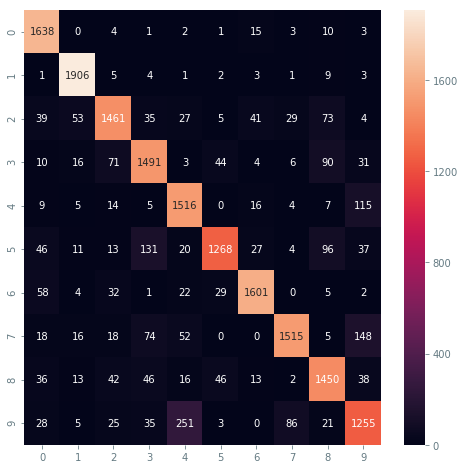

In [16]:
conf_mx = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(conf_mx, annot=True, fmt="d")
plt.show()

In [17]:
index = 0
misclassified = []
for label, predict in zip(y_test, y_test_pred):
    if label != predict:
        misclassified.append(index)
    index += 1

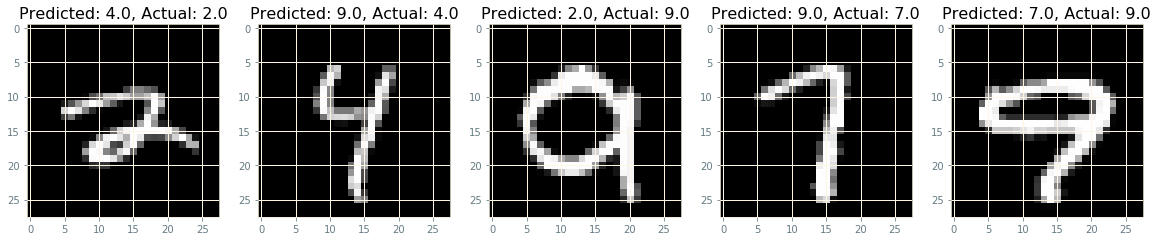

In [18]:
plt.figure(figsize=(20, 4))
for plot, i in enumerate(misclassified[0:5]):
    ax = plt.subplot(1, 5, plot + 1) 
    ax.set_title(f"Predicted: {y_test_pred[i]}, Actual: {y_test[i]}")
    plt.imshow(np.reshape(X_test[i], (28,28)), cmap=plt.cm.gray)

## Saving Model For Blender

In [20]:
from joblib import dump
dump(poly_svm_clf, "svm_clf.joblib")

['svm_clf.joblib']

### References

[] https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72

[] https://www.kdnuggets.com/2016/06/select-support-vector-machine-kernels.html

[] https://thuijskens.github.io/2016/12/29/bayesian-optimisation/

[] https://github.com/ksopyla/svm_mnist_digit_classification

[] http://yann.lecun.com/exdb/mnist/

[] http://www.robots.ox.ac.uk/~az/lectures/ml/lect2.pdf